Dalam data Penyebab Diabetes ini saya menyimpulkan bahwa :
- Korelasi yang sangat kuat dengan hasil Diabetes adalah Glukosa dengan nilai korelasi 47%
    Glukosa yg tinggi sangat berpotensi seseorang mengalami diabetes (Outcome = 1)
- sedangkan korelasi kedua adalah BMI = 29%, Age = 24% dan Pregnancies = 22% terhadap Outcome Diabetes
- Setelah di-train test kemudian diprediksi menggunakan Regresi Linier, dihasilkan Accuracy = 0.76 
    dimana akurasi tersebut cukup baik

In [115]:
# LOGISTIC REGRESI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [116]:
df = pd.read_csv('diabetes.csv')
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [117]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [118]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

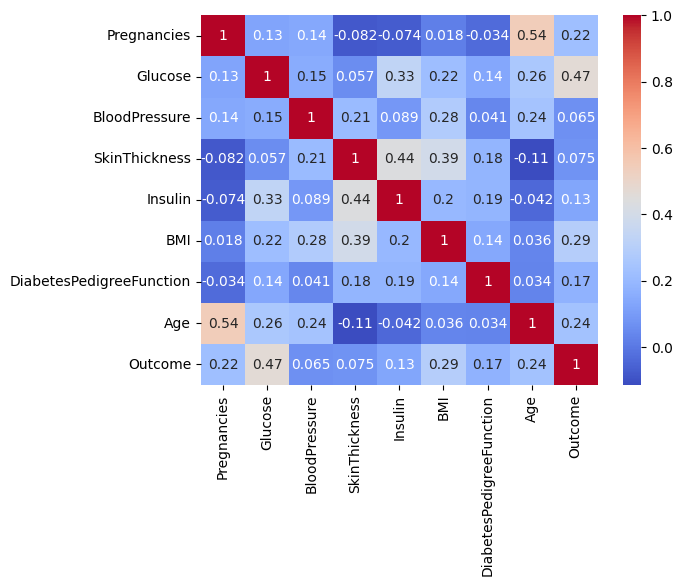

In [119]:
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')


In [120]:
X = df.drop(columns='Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [121]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\ticcu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [122]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [123]:
X_test.shape, y_test.shape
df_test = pd.concat([X_test, y_test], axis=1)
df_test.query('Outcome==1').head(5).sort_values(by='Glucose')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
19,1,115,70,30,96,34.6,0.529,32,1
493,4,125,70,18,122,28.9,1.144,45,1
614,11,138,74,26,144,36.1,0.557,50,1
355,9,165,88,0,0,30.4,0.302,49,1
445,0,180,78,63,14,59.4,2.420,25,1


In [124]:
df_test.query('Outcome==0').head(5).sort_values(by='Glucose')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
352,3,61,82,28,0,34.4,0.243,46,0
581,6,109,60,27,0,25.0,0.206,27,0
726,1,116,78,29,180,36.1,0.496,25,0
285,7,136,74,26,135,26.0,0.647,51,0
101,1,151,60,0,0,26.1,0.179,22,0


In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Akurasi
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Precision, Recall, F1
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC AUC
y_prob = model.predict_proba(X_test)[:,1]  # probabilitas kelas 1
print("ROC AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.7760416666666666
Confusion Matrix:
 [[109  14]
 [ 29  40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192

ROC AUC: 0.8467067279368446


In [126]:
confusion_matrix(y_test, y_pred)

array([[109,  14],
       [ 29,  40]])

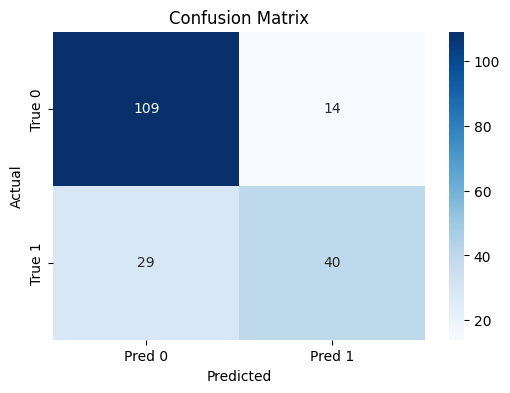

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0','Pred 1'],
            yticklabels=['True 0','True 1'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

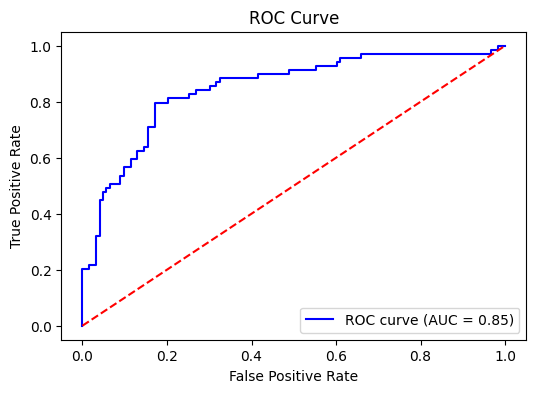

In [128]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:,1]  # probabilitas kelas 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='red', linestyle='--')  # garis acuan
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

<Axes: >

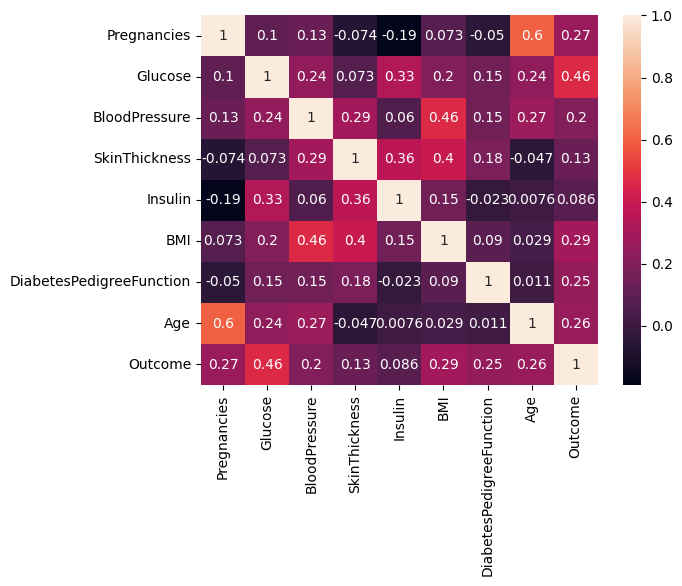

In [129]:
sns.heatmap(df_test.corr(), annot=True)

<Axes: >

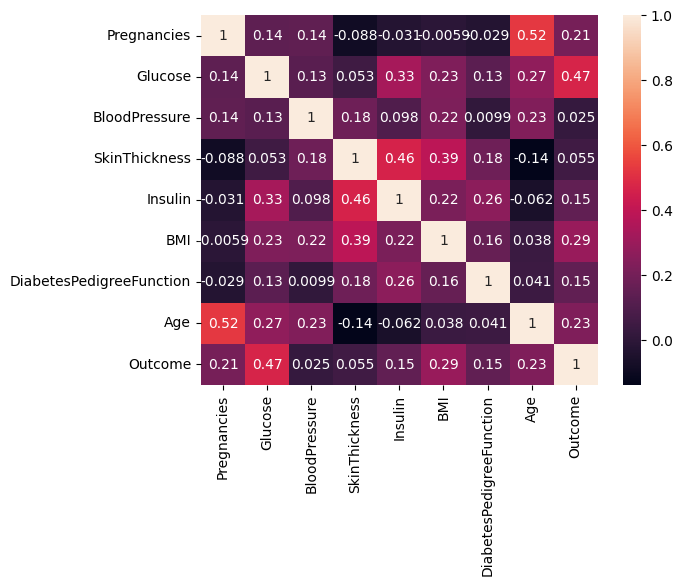

In [130]:
df_train = pd.concat([X_train, y_train], axis=1)
sns.heatmap(df_train.corr(), annot=True)

Berdasarkan data yang diperoleh dapat disimpulkan bahwa :
- Glukosa adalah yang paling mempengaruhi seseorang diabetes / tidak
- Yang kedua adalah BMI dan Age
- Skor Akurasi 0.76% sudah cukup baik (memprediksi 76 benar dari 100)

In [131]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7760416666666666
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



#apayang terjadi jika kita hanya memakai Fitur utama penyebab diabetes, berapa akurasinya

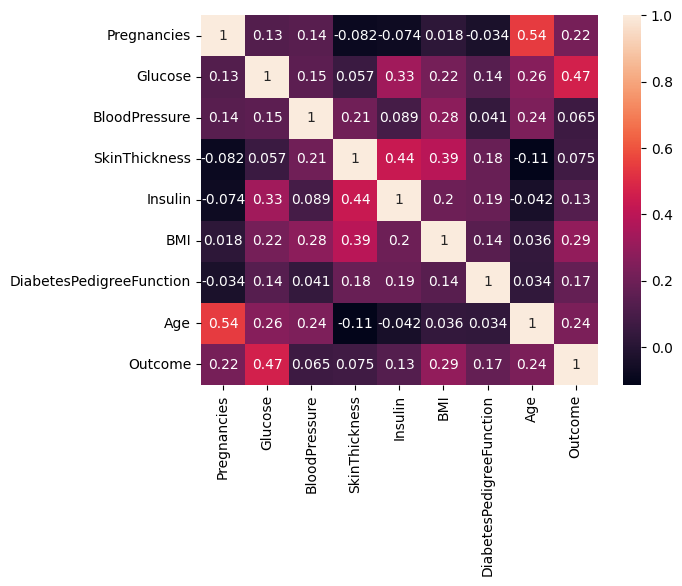

In [138]:
sns.heatmap(df.corr(), annot=True)
# kita hanya akan menggunakan 
# Glukosa, preganncies, BMI, insulin, Age, dan diabetesPedigreeFunction
df.columns
X_new= df[['Pregnancies', 'Glucose', #'BloodPressure', 'SkinThickness', 
        #'Insulin',
       'BMI', #'DiabetesPedigreeFunction', 
       'Age']]
y_new = df['Outcome']


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.25, random_state=1)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_new = model.predict(X_test)
y_pred_new, accuracy_score(y_test, y_pred_new)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]),
 0.765625)

bagaimana jika discaler


In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
accuracy_score(y_test, y_pred_new)

0.765625